In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Linear Regression Minimize Cost Function
seeing to this prediction equation:
>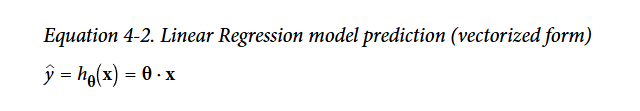

where:
>![alt text](image.png)


> This equation determines how the model make predictions.x being a vector matirx containg the features and h0 the hypothesis that use stastistics from data to formulates relations used on his predictions for classify data.

Meansuring:
>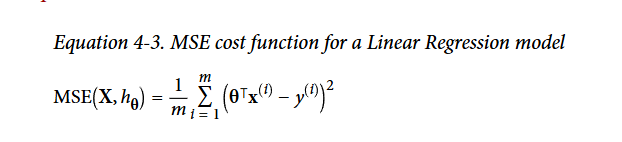

As you can see,we calculate mse with h0 using theta.

And for Minimize them with the cost function,we can use L.Algebra:
>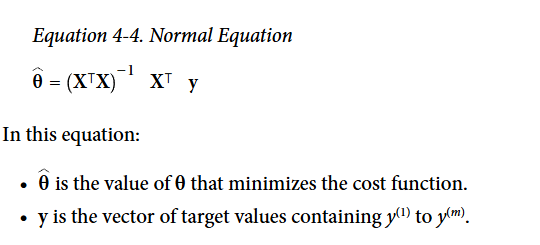


Text(0, 0.5, 'y')

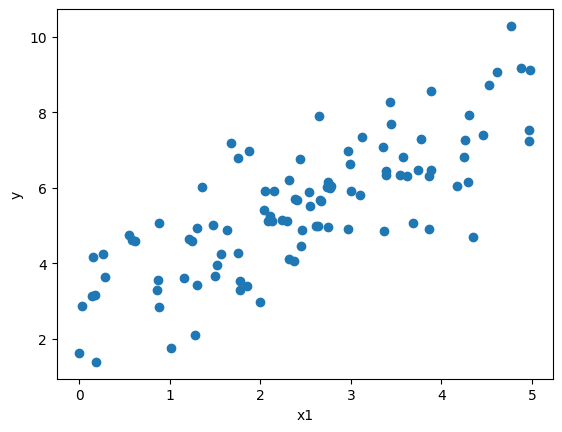

In [22]:
X = 5 * np.random.rand(100,1) #data
y = 3 + 1 * X + np.random.randn(100,1) #samples [max:5*(4*5)]

#Custom data:
plt.scatter(X,y)
plt.xlabel("x1")
plt.ylabel("y")

In [23]:
#Normal equation for find low cost function:
#x matrix
X_b=np.c_[np.ones((100,1)),X]

#normal equa:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #inverse matrix-vector camputating and Gaussian Process
#t is the transposte


In [24]:
print(theta_best) #

[[2.92218091]
 [1.04203585]]


### Predictions:
We need use tha same o aproximately nums

In [25]:
x_new_data = np.array([[0],[3]])
x_new_data_y = np.c_[np.ones((2,1)),x_new_data]

y_predict=x_new_data_y.dot(theta_best)

print(y_predict)

[[2.92218091]
 [6.04828847]]


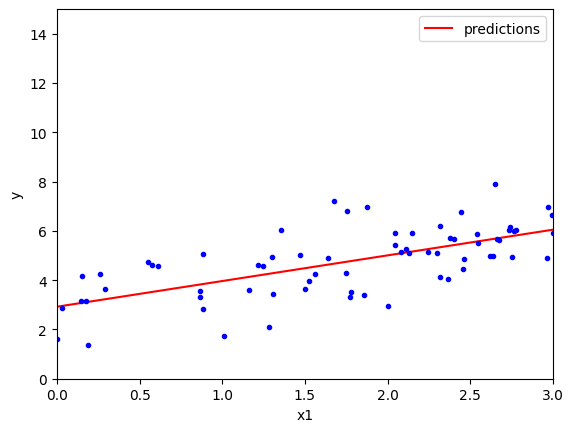

In [26]:
plt.plot(x_new_data,y_predict,"r-",label="predictions")
plt.legend()
plt.xlabel("x1")
plt.ylabel("y")
plt.plot(X,y,"b.")
plt.axis([0,3,0,15])
plt.show()

In [27]:
#comparing to l reg:

from sklearn.linear_model import LinearRegression

lg=LinearRegression()
lg.fit(X,y)

#theta:
lg.intercept_,lg.coef_


(array([2.92218091]), array([[1.04203585]]))

In [28]:
lg_predicts= lg.predict(x_new_data)
print(lg_predicts)

[[2.92218091]
 [6.04828847]]


#### Compunting theta of l.reg using algebra:

In [29]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6) #target and l.g params
theta_best_svd # :  X(pseudoinv).dot(y)

#psoudoinverse:
theta_ps=np.linalg.pinv(X_b).dot(y)

print(theta_best_svd)

[[2.92218091]
 [1.04203585]]


#### Gradiant Descent
> A gradient in simple terrms is one equation that meansures the varaince of x-y graph.
>with this,you can ajust model params and meansure MSE(theta) for reach lowest cost function according the partial derivatives.
>you will substact params from gradinet until the MSE(theta) converges(values not change).

Let's use the same data withwith the same model to compare if Gd will find the last values for theta.

gradient of each cost function:
>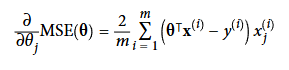

for find the cost function,we compute a gradient vector like this:
> 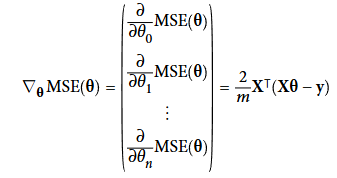

with that, we will use a for-loop and compute each gradient using the step:
>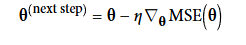

In [77]:
eta = 0.15 #learning rate param
iterations = 500 #steps 
m = 100 #data

theta = np.random.randn(2,1) #start randomly the cost function

def gradient_descent(theta,m,eta,iterations):
    for iter in range(iterations):

        gradient = 2/m * X_b.T.dot(X_b.dot(theta)-y) #gradient vector
        theta = theta - eta * gradient 

    return theta

print(gradient_descent(theta,m,eta,iterations))

[[-4.48746131e+97]
 [-1.38222373e+98]]


As you seen,we find the minimum cost function again with other method.

> We can also see how the gradient peforms using diferent learning rates:

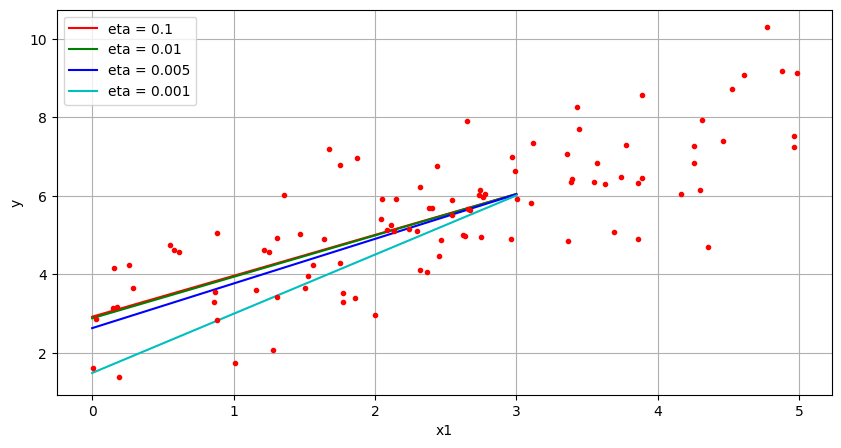

[[1. 0.]
 [1. 3.]] [[2.92218091]
 [6.04828847]]


In [103]:

plt.figure(figsize=(10,5))


h=x_new_data_y.dot(gradient_descent(theta,m,eta=0.1,iterations=1000))
#eta needs to be between m 
plt.plot(x_new_data,h,"r",label=f"eta = 0.1")

h=x_new_data_y.dot(gradient_descent(theta,m,eta=0.01,iterations=1000))
plt.plot(x_new_data,h,"g",label=f"eta = 0.01")

h=x_new_data_y.dot(gradient_descent(theta,m,eta=0.005,iterations=1000))
plt.plot(x_new_data,h,"b",label=f"eta = 0.005")

h=x_new_data_y.dot(gradient_descent(theta,m,eta=0.001,iterations=1000))
plt.plot(x_new_data,h,"c",label=f"eta = 0.001")

plt.plot(X,y,"r.")
#plt.axis([0,5,0,15])
plt.xlabel("x1")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

plt.show()
print(x_new_data_y,y_predict)

#### Stochastic Gradient Descent
> Instead to compute a batch gd,with a large train set; sgd picks up a random instance of train set on every step.
> by this form,sgd computes vector gradient of each step.

In [ ]:
n_epochs = 50
t0 , t1 = 5,50 # eta of sgd (basically the learning rate params)

theta = np.random.randn(2,1)

def learning_schedule(t): #
    return t0 / (t+t1)